In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Superdense Coding

Initially Alice and Bob entangle two qubits in a Bell state.
$$|{\psi ^+}\rangle=\frac{1}{\sqrt{2}}(|{00}\rangle + |{11}\rangle)$$

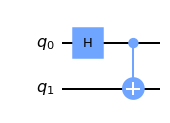

In [2]:
qc = QuantumCircuit(2,)
qc.h(0)
qc.cnot(0,1)
qc.draw()

Alice takes one of these entangled qubits with her. She then intends to send two bits of information but she wants to do it using only the qubit she has. She then applies some gates on her qubits in order to achieve that. The gates which she applies depend on the information she wants to send as shown below.

If she wants to send 00, she doesn't need to apply any gate, which leaves the qubits in the original state:
$$|{\psi}\rangle=\frac{1}{\sqrt{2}}(|{00}\rangle + |{11}\rangle)$$

If she wants to send 01, she needs to apply the X gate, which brings the qubits to the following state:
$$|{\psi}\rangle=\frac{1}{\sqrt{2}}(|{10}\rangle + |{01}\rangle)$$

If she wants to send 10, she needs to apply the Z gate, which brings the qubits to the following state:
$$|{\psi}\rangle=\frac{1}{\sqrt{2}}(|{00}\rangle - |{11}\rangle)$$

If she wants to send 11, she needs to apply an X gate followed by a Z gate, which bring the qubits to the following state:
$$|{\psi}\rangle=\frac{1}{\sqrt{2}}(-|{10}\rangle + |{01}\rangle)$$

Lets say that Alice wants to send 11. So she will apply X,Z gates on the qubit.

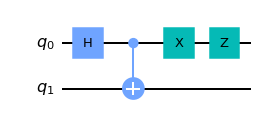

In [3]:
qc.x(0)
qc.z(0)
qc.draw()

Bob then recieves the qubit from Alice and applies a CNOT gate followed by a Hadamard gate.

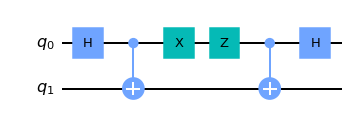

In [4]:
qc.cnot(0,1)
qc.h(0)
qc.draw()

Let us now see how these gates change the state of our two qubits.

After the CNOT we get the following state:

$$|{\psi}\rangle=\frac{1}{\sqrt{2}}(-|{11}\rangle + |{01}\rangle)$$

and after applying the Hadamard, it reduces to:

$$|{\psi}\rangle= (H\otimes I)(\frac{1}{\sqrt{2}}(-|{1}\rangle + |{0}\rangle)\otimes |{1}\rangle)$$


$$|{\psi}\rangle= |{11}\rangle$$

The protocol is essentially complete and Bob can now recieve the information by measuring the qubits.

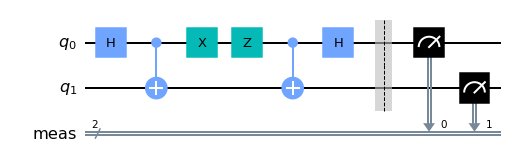

In [5]:
qc.measure_all() # we measure all the qubits
qc.draw()

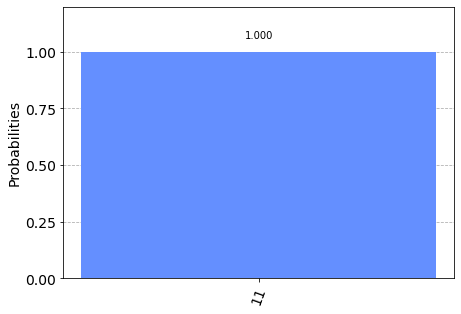

In [6]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

Regardless of which bits alice decides to send, Bob will always measure the qubits after applying a CNOT and a Hadamard and will be able to recieve the information.

Lets try sending other possible bit pairs with this protocol as well.

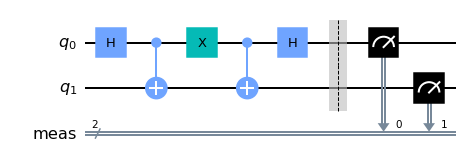

In [7]:
qc1 = QuantumCircuit(2,)
qc1.h(0)
qc1.cnot(0,1)
qc1.x(0)
qc1.cnot(0,1)
qc1.h(0)
qc1.measure_all() # we measure all the qubits
qc1.draw()

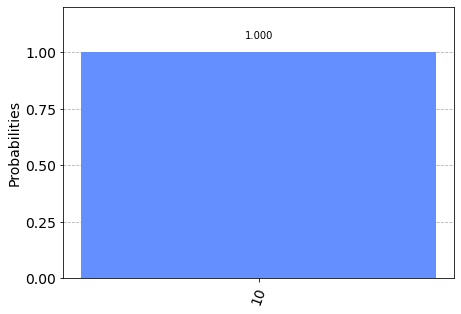

In [8]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc1, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

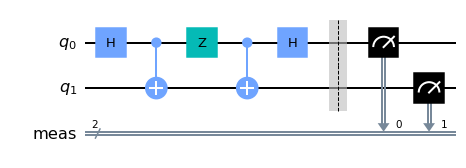

In [9]:
qc2 = QuantumCircuit(2,)
qc2.h(0)
qc2.cnot(0,1)
qc2.z(0)
qc2.cnot(0,1)
qc2.h(0)
qc2.measure_all() # we measure all the qubits
qc2.draw()

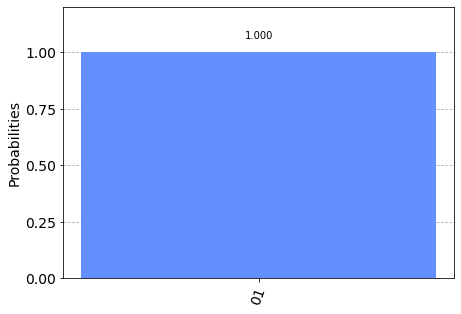

In [10]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc2, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

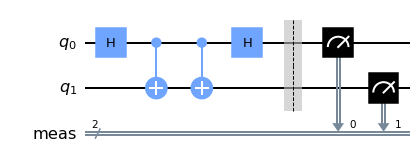

In [11]:
qc3 = QuantumCircuit(2,)
qc3.h(0)
qc3.cnot(0,1)
qc3.cnot(0,1)
qc3.h(0)
qc3.measure_all() # we measure all the qubits
qc3.draw()

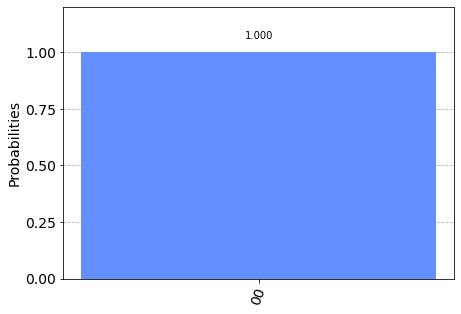

In [12]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc3, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

## Phase Kickback

By now we know how control gates such as CNOT, Controlled Z, etc. work. However, they might show some interesting and sometimes counter-intuitive behaviours. One such property is the phase kickback.

Consider a two qubit circuit. Let the both qubits be in the zero state.

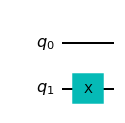

In [13]:
qc4 = QuantumCircuit(2,)
qc4.x(1)
qc4.draw()

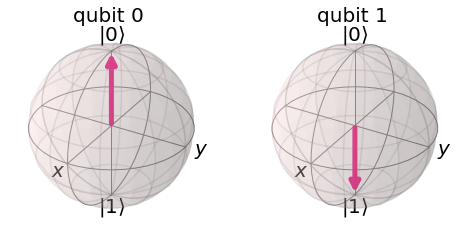

In [14]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc4, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_bloch_multivector(state1)

Now lets apply the phase gate to the 2nd qubit with a control on the first.

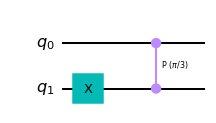

In [15]:
qc4.cp(np.pi/3,0,1)
qc4.draw()

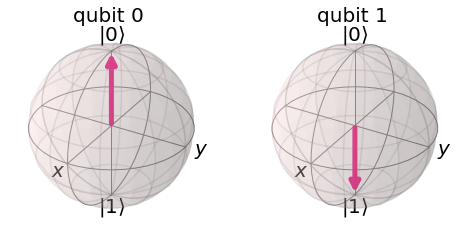

In [16]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc4, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_bloch_multivector(state1)

This will not do anything since the control qubit is zero. But what about if the 1st qubit is in the $|{+}\rangle$ state?

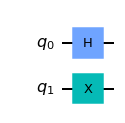

In [17]:
qc5 = QuantumCircuit(2,)
qc5.x(1)
qc5.h(0)
qc5.draw()

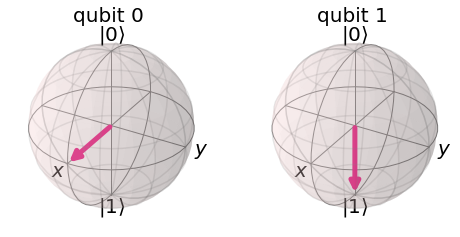

In [18]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc5, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_bloch_multivector(state1)

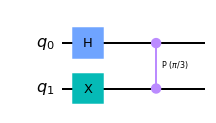

In [19]:
qc5.cp(np.pi/3,0,1)
qc5.draw()

Let us analyse this circuit first.

Firstly we put our system in the following state:
$$|{\psi}\rangle= (H\otimes X)(|{0}\rangle\otimes |{0}\rangle)$$

$$= \frac{1}{\sqrt{2}}(|{0}\rangle + |{1}\rangle)\otimes |{1}\rangle$$

$$= \frac{1}{\sqrt{2}}(|{01}\rangle + |{11}\rangle)$$


Then we apply a controlled phase gate with an angle $\phi$. This gives us the following state.

$$CP(\phi)|{\psi}\rangle= \frac{1}{\sqrt{2}}(|{0}\rangle|{1}\rangle + |{1}\rangle P(\phi)|{1}\rangle)$$
$$= \frac{1}{\sqrt{2}}(|{01}\rangle + e^{i\phi}|{11}\rangle)$$
$$= \frac{1}{\sqrt{2}}(|{0}\rangle + e^{i\phi}|{1}\rangle)\otimes |{1}\rangle$$

Notice that nothing happened to the target qubit while the phase gate was applied to the control qubit.

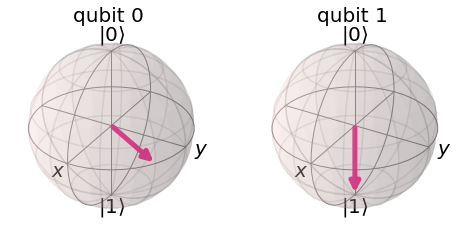

In [20]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc5, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_bloch_multivector(state1)

Thus instead of phase gate effecting the target qubit, the effect is kicked back to the control qubit.